# 주성분 분석(Principal Componet Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

### Iris 데이터 차원축소

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
from sklearn.preprocessing import StandardScaler
iris.std = StandardScaler().fit_transform(iris.data) # 표준 정규분포로 전환

In [13]:
iris.std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

-Scikit-Learn으로 차원축소

In [9]:
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
pca = PCA(n_components=2) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다. 

In [11]:
iris_pca = pca.fit_transform(iris.std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [14]:
pca.explained_variance_ratio_ # .주성분의 첫번째 성분은 72퍼센트를 말해주고 두번째 성분은 23프로를 말해준다 
                              # 96프로의 데이터를 표현 할 수 있다. 

array([0.72962445, 0.22850762])

- PCA 전후 분류 비교

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(
    
# )

In [20]:
# 원본 데이터로 분류
X_train,X_test,y_train,y_test = train_test_split(
 iris.data,iris.target,stratify=iris.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8947368421052632

In [23]:
# PCA 데이터로 분류 
X_train,X_test,y_train,y_test = train_test_split(
 iris_pca,iris.target,stratify=iris.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8947368421052632

In [24]:
# std 로 분류
X_train,X_test,y_train,y_test = train_test_split(
 iris.std,iris.target,stratify=iris.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8947368421052632

데이터 시각화

In [30]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

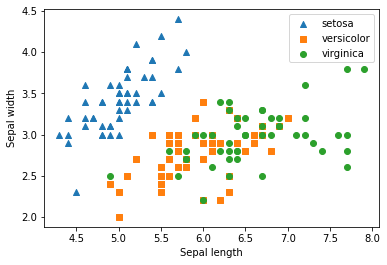

In [39]:
# original data
# Sepal length vs Sepal width
markers = ['^','s','o'] # Setosa-세모 , Versicolor 네모 , virginica = 동그라미

for i,marker in enumerate(markers):
    x_axis_data = df[df.species == i]['sepal length (cm)']
    y_axis_data = df[df.species == i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,
                label=iris.target_names[i])
plt.legend() # 범례
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.show()


PCA 데이터

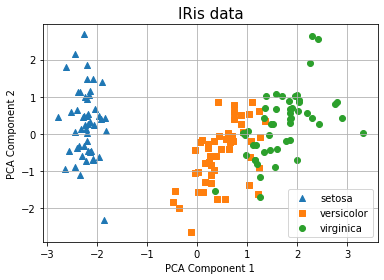

In [45]:
markers = ['^','s','o'] # Setosa-세모 , Versicolor-네모 , virginica-동그라미
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

for i,marker in enumerate(markers):
    x_axis_data = df[df.species == i]['PC1']
    y_axis_data = df[df.species == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,
                label=iris.target_names[i])
plt.legend() # 범례
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('IRis data',fontsize = 15)
plt.grid()
plt.show()
